In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
cardio_df = pd.read_csv("..\data\\raw\cardio.csv", sep=";", index_col="id")

In [21]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Cambio de Valores de age de dias a años

In [25]:
cardio_df["age"] = (cardio_df["age"] / 365).round().astype("int")
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
cardio_df["gender"] = cardio_df["gender"].replace({1:0, 2:1})
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0


In [22]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [24]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [36]:
cardio_df = cardio_df.drop_duplicates()

In [37]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66184 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66184 non-null  int32  
 1   gender       66184 non-null  int64  
 2   height       66184 non-null  int64  
 3   weight       66184 non-null  float64
 4   ap_hi        66184 non-null  int64  
 5   ap_lo        66184 non-null  int64  
 6   cholesterol  66184 non-null  int64  
 7   gluc         66184 non-null  int64  
 8   smoke        66184 non-null  int64  
 9   alco         66184 non-null  int64  
 10  active       66184 non-null  int64  
 11  cardio       66184 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 6.3 MB


In [31]:
print(cardio_df["ap_hi"].unique())
print(cardio_df["ap_lo"].unique())

[  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   144   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193    99
   196   309   401 16020  1202   806  1300   230   207   215    97  1409
 11020    24   960 13010  1110   195  1205   187  2000]
[   80    90    70   100    60    85    89   110    65    63    79  

In [61]:
cardio_df.drop(cardio_df[cardio_df["ap_hi"] < 30].index, inplace=True)
cardio_df.drop(cardio_df[cardio_df["ap_hi"] > 220].index, inplace=True)
cardio_df.drop(cardio_df[cardio_df["ap_lo"] < 30].index, inplace=True)
cardio_df.drop(cardio_df[cardio_df["ap_lo"] > 160].index, inplace=True)

In [66]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,64946.0,53.352678,6.810992,30.0,48.0,54.0,59.0,65.0
gender,64946.0,0.356481,0.478963,0.0,0.0,0.0,1.0,1.0
height,64946.0,164.347412,8.330442,55.0,159.0,165.0,170.0,250.0
weight,64946.0,74.496051,14.551876,11.0,65.0,72.0,82.3,200.0
ap_hi,64946.0,126.964940,17.062374,60.0,120.0,120.0,140.0,220.0
ap_lo,64946.0,81.454177,9.820205,30.0,80.0,80.0,90.0,160.0
cholesterol,64946.0,1.384042,0.691192,1.0,1.0,1.0,2.0,3.0
gluc,64946.0,1.237859,0.584022,1.0,1.0,1.0,1.0,3.0
smoke,64946.0,0.092739,0.290068,0.0,0.0,0.0,0.0,1.0
alco,64946.0,0.056616,0.231110,0.0,0.0,0.0,0.0,1.0


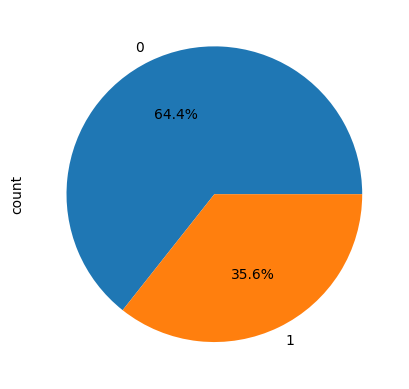

In [101]:
gender = cardio_df["gender"].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.show()

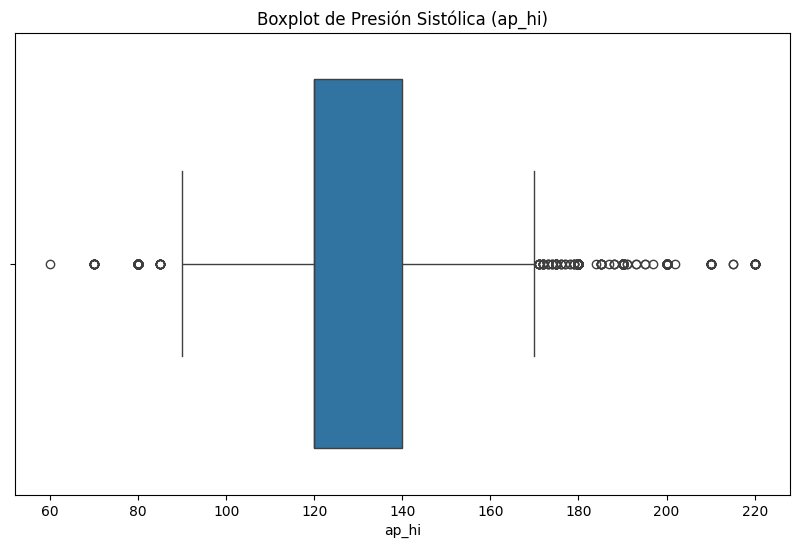

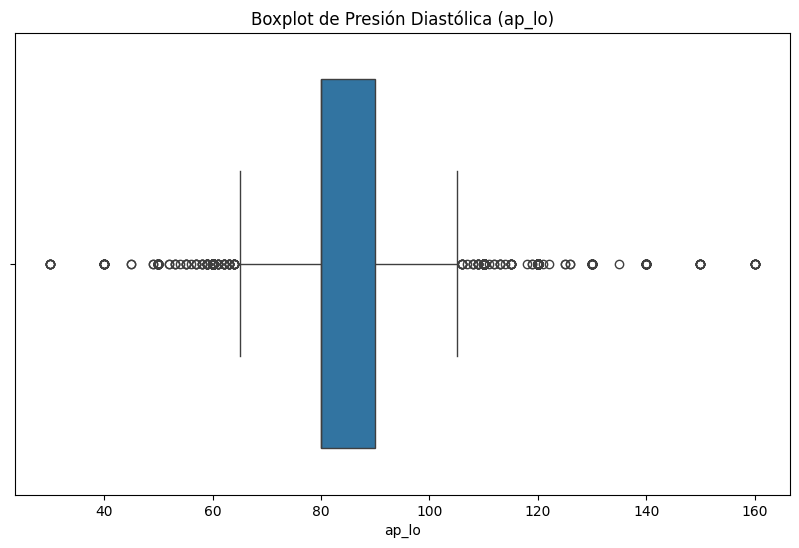

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cardio_df["ap_hi"])
plt.title('Boxplot de Presión Sistólica (ap_hi)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=cardio_df["ap_lo"])
plt.title('Boxplot de Presión Diastólica (ap_lo)')
plt.show()

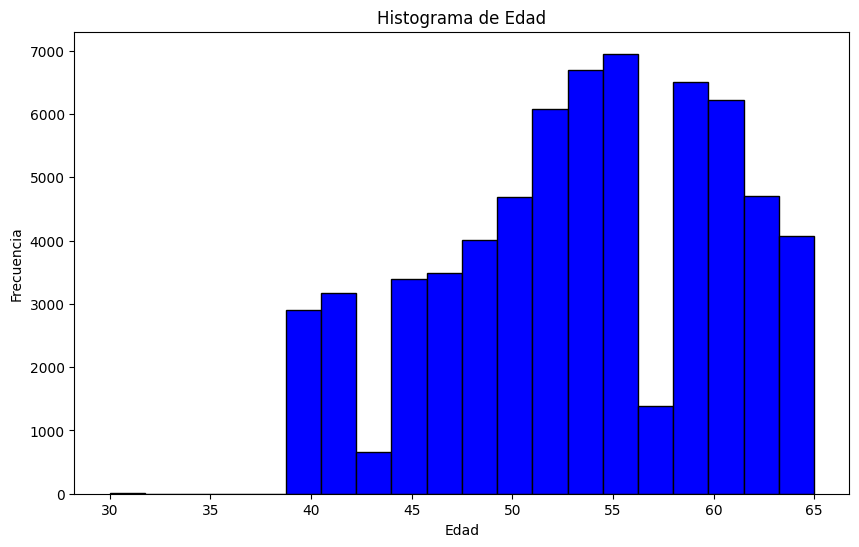

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(cardio_df['age'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

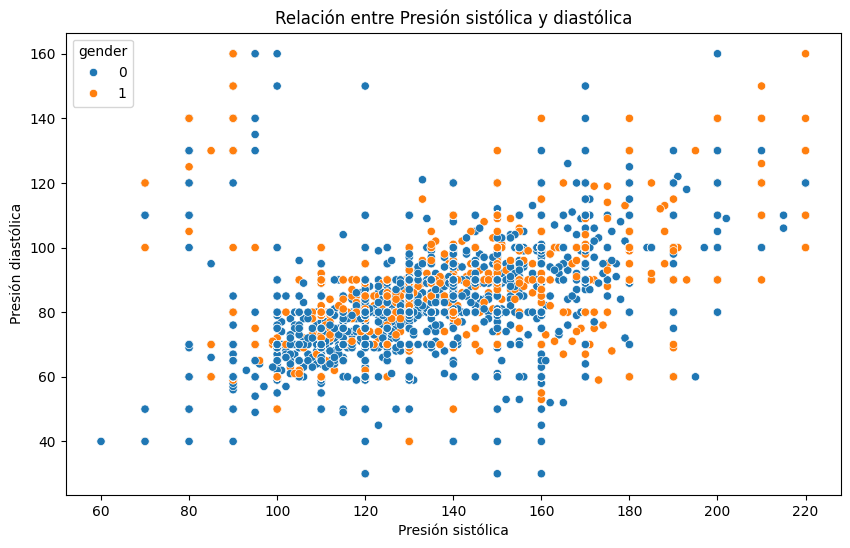

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cardio_df['ap_hi'], y=cardio_df['ap_lo'], hue=cardio_df['gender'])
plt.title('Relación entre Presión sistólica y diastólica')
plt.xlabel('Presión sistólica')
plt.ylabel('Presión diastólica')
plt.show()

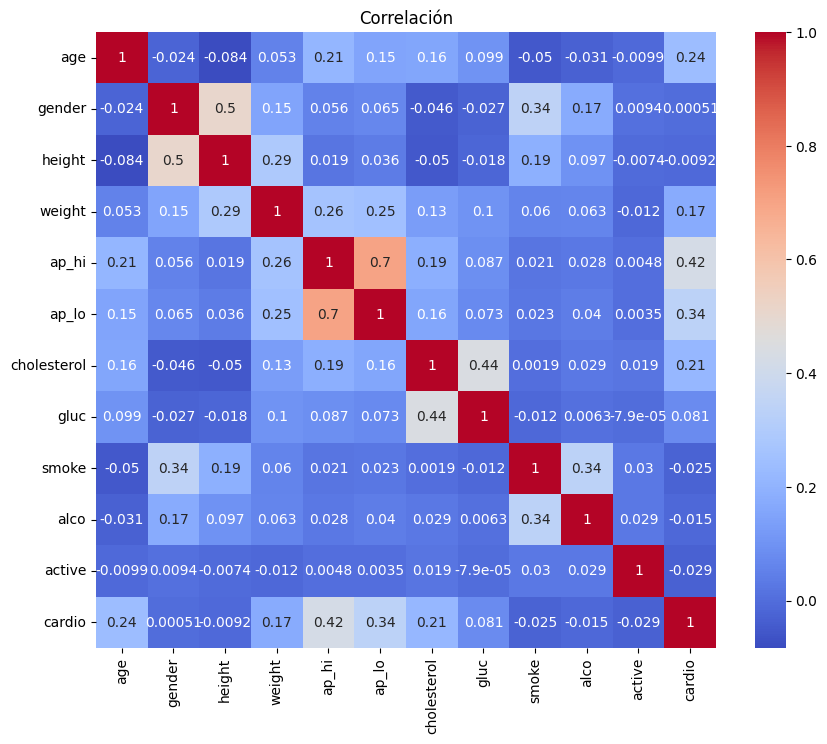

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(cardio_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación')
plt.show()


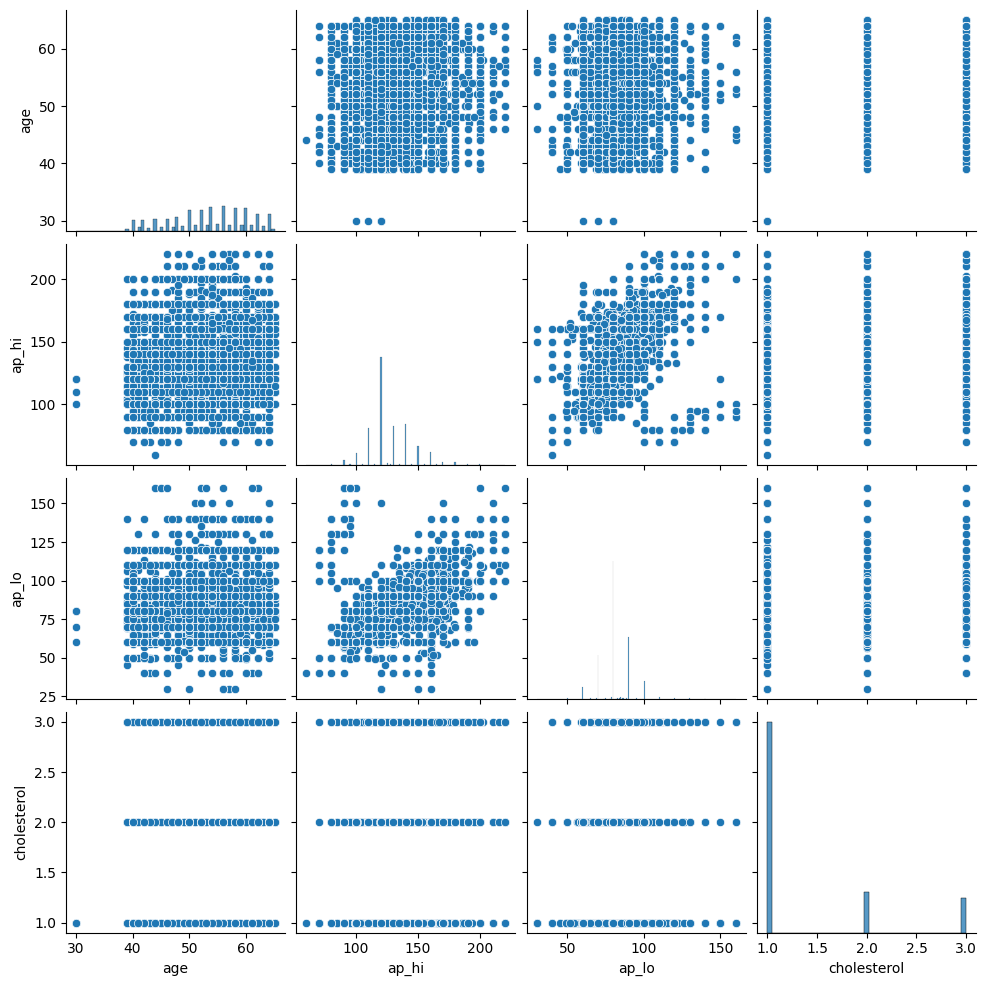

In [77]:
sns.pairplot(cardio_df[['age', 'ap_hi', 'ap_lo', 'cholesterol']])
plt.show()

In [80]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cardio_df)

In [93]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
cardio_df['cluster'] = clusters

In [95]:
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster
id,,,,,,,,,,,,,
0,50,1,168,62.0,110,80,1,1,0,0,1,0,1
1,55,0,156,85.0,140,90,3,1,0,0,1,1,2
2,52,0,165,64.0,130,70,3,1,0,0,0,1,2
3,48,1,169,82.0,150,100,1,1,0,0,1,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,1,168,76.0,120,80,1,1,1,0,1,0,1
99995,62,0,158,126.0,140,90,2,2,0,0,1,1,2
99996,52,1,183,105.0,180,90,3,1,0,1,0,1,1


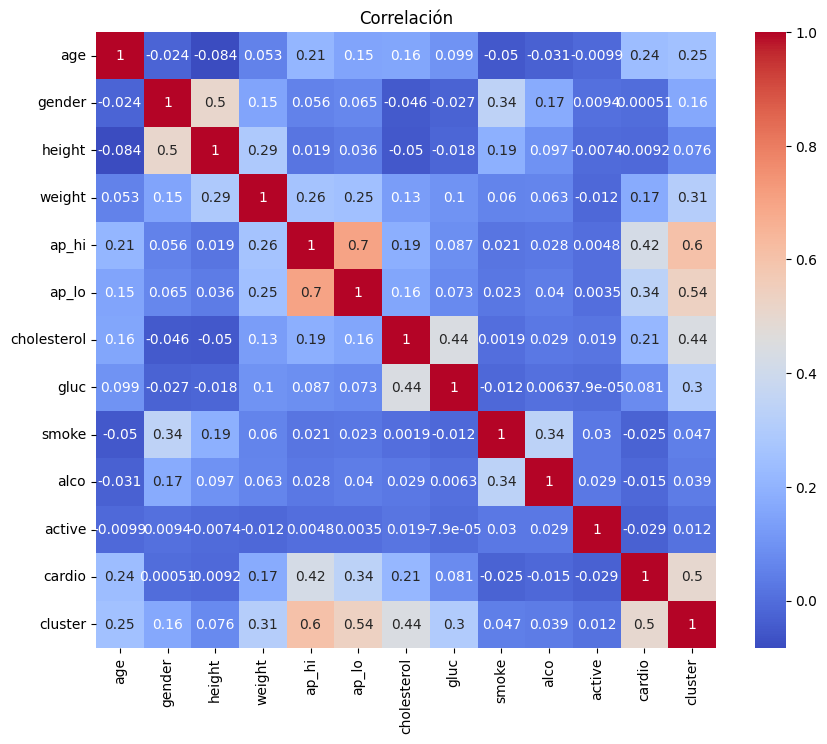

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(cardio_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación')
plt.show()

In [96]:
cardio_df["cluster"].unique()

array([1, 2, 0])